In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
with open('shellpath_paddings.json') as f:
    paths_df = pd.json_normalize(json.load(f))

paths_df['length_per_goal'] = paths_df['final_path_length'] / paths_df['goals_visited']

In [3]:
paths_df

,final_path_length,goals_visited,napples,planner_name,run_time,scene_name,start_state,planner_params.apply_shellstate_optimization,planner_params.ptp.ptp,planner_params.ptp.timePerAppleSeconds,planner_params.ptp.tryLuckyShots,planner_params.ptp.useCostConvergence,planner_params.ptp.useImprovisedSampler,planner_params.shell_builder_params.padding,length_per_goal
0,408.676668,148,150,ShellPathPlanner,32.809901,appletree,0,True,PRMstar,1.0,True,True,True,1.0,2.761329
1,370.272185,146,150,ShellPathPlanner,28.991694,appletree,11,True,PRMstar,1.0,True,True,True,3.0,2.536111
2,391.225299,148,150,ShellPathPlanner,35.956947,appletree,19,True,PRMstar,1.0,True,True,True,0.0,2.643414
3,403.831653,147,150,ShellPathPlanner,28.480440,appletree,4,True,PRMstar,1.0,True,True,True,2.5,2.747154
4,448.530281,149,150,ShellPathPlanner,26.859382,appletree,8,True,PRMstar,1.0,True,True,True,5.0,3.010270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,386.130942,147,150,ShellPathPlanner,24.519744,appletree,12,True,PRMstar,1.0,True,True,True,0.5,2.626741
216,366.388691,146,150,ShellPathPlanner,22.268735,appletree,1,True,PRMstar,1.0,True,True,True,3.0,2.509512
217,426.336479,148,150,ShellPathPlanner,22.612146,appletree,14,True,PRMstar,1.0,True,True,True,2.5,2.880652
218,477.292173,149,150,ShellPathPlanner,21.931101,appletree,8,True,PRMstar,1.0,True,True,True,4.5,3.203303


In [4]:
agg = paths_df.groupby('planner_params.shell_builder_params.padding')[['goals_visited','length_per_goal']].agg(['sem','mean'])

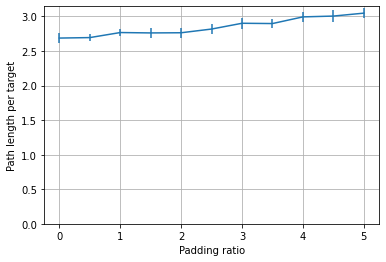

In [5]:
plt.errorbar(x=agg.index, y=agg['length_per_goal']['mean'], yerr=agg['length_per_goal']['sem']*1.96)
plt.ylim(bottom=0)
plt.ylabel('Path length per target')
plt.xlabel('Padding ratio')

plt.grid()

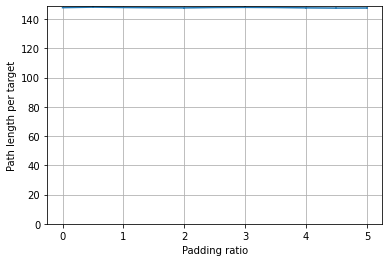

In [6]:
plt.errorbar(x=agg.index, y=agg['goals_visited']['mean'], yerr=agg['goals_visited']['sem']*1.96)
plt.ylim(bottom=0)
plt.ylabel('Path length per target')
plt.xlabel('Padding ratio')

plt.grid()